## EDA & WordCloud : Women's E-commerce Reviews

### What key words should you consider when designing women's fashion?

#### Import Data

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
ecom = pd.read_csv("../input/Womens Clothing E-Commerce Reviews.csv", index_col=1)

In [127]:
ecom.head()

,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,,
767,0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1080,1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1077,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1049,3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
847,4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [128]:
ecom.drop(columns='Unnamed: 0', inplace=True)

In [129]:
ecom.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [130]:
print("There are total " + str(len(ecom.index.unique())) + " unique items in this dataset")

There are total 1206 unique items in this dataset


#### What are the ages of shoppers?

Text(0.5,1,'Distribution of Age')

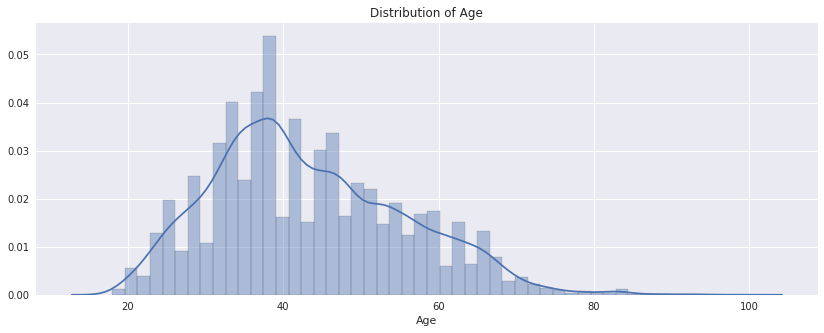

In [131]:
sns.set(style="darkgrid")
plt.figure(figsize= (14,5))
sns.distplot(ecom['Age'], hist_kws=dict(edgecolor="k")).set_title("Distribution of Age")

#### How are the product ratings distributed?

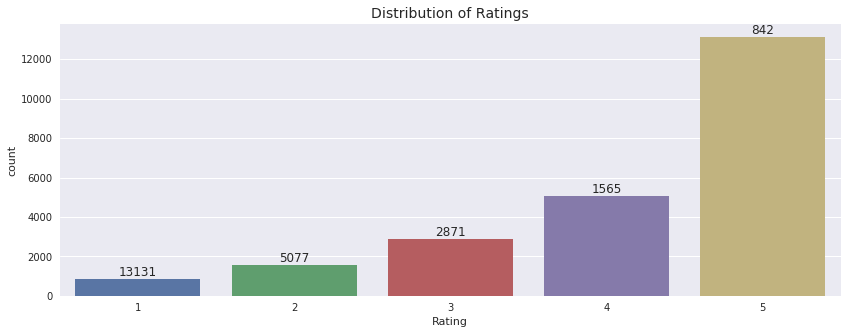

In [132]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Rating', data=ecom)
ax.set_title("Distribution of Ratings", fontsize=14)

x=ecom['Rating'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#### How many reviews are there per product category?

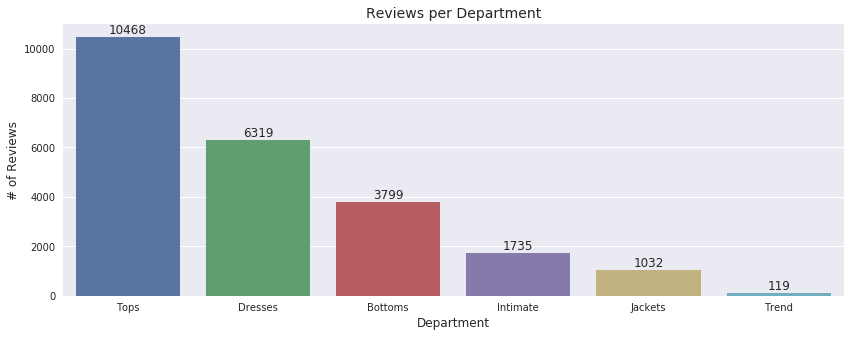

In [133]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Department Name', data=ecom, order = ecom['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)

x=ecom['Department Name'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [134]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 767 to 1104
Data columns (total 9 columns):
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(4), object(5)
memory usage: 2.4+ MB


In [135]:
ecom.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

#### Remove all rows without textual reviews

In [136]:
ecom.dropna(subset=['Review Text'], inplace=True)

#### Add length of review as a separate column

In [137]:
ecom['Length'] = ecom['Review Text'].apply(len)
ecom.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Length
Clothing ID,,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


#### Length of reviews per rating scale

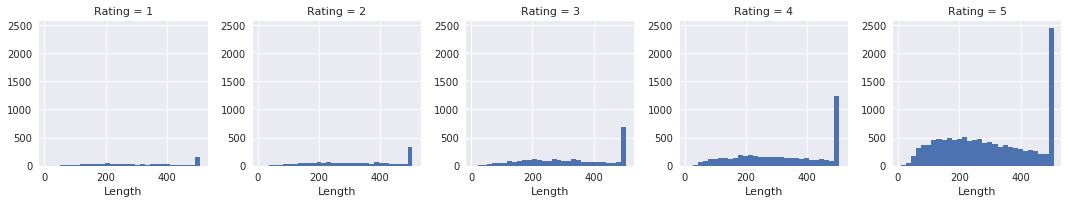

In [138]:
d = sns.FacetGrid(ecom, col='Rating')
d.map(plt.hist,'Length',bins=30)

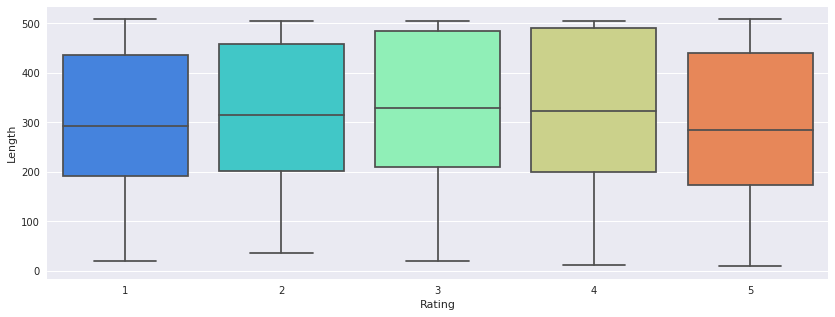

In [139]:
plt.figure(figsize= (14,5))
sns.boxplot(x='Rating', y='Length', data=ecom, palette='rainbow')

### Let's build some WordClouds!

In [140]:
import re

def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    words = letters_only.lower().split()                            
    return( " ".join( words ))    

In [141]:
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)|{'skirt', 'blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse'}

def create_cloud(rating):
    x= [i for i in rating]
    y= ' '.join(x)
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(15,7.5))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

### Top Words in Rating = 5
* love
* color
* great
* comfortable
* look
* one
* perfect

Words to consider when designing women's clothing: comfortable, soft, beautiful, well made, detail, design, versatile

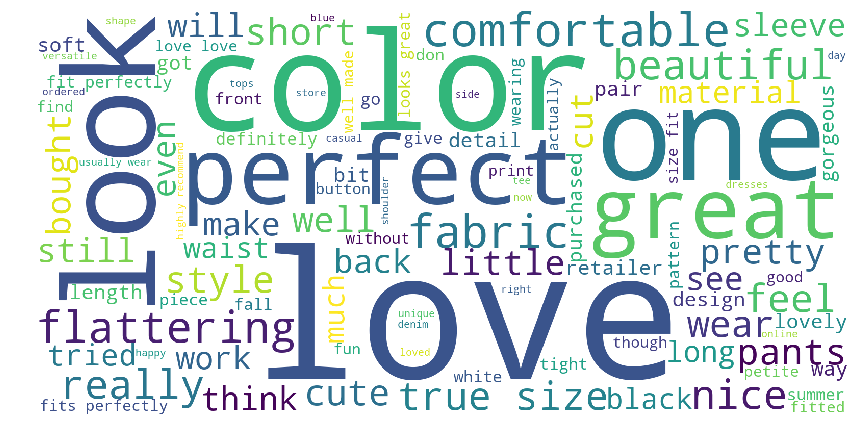

In [142]:
rating5= ecom[ecom['Rating']==5]['Review Text'].apply(clean_data)
create_cloud(rating5)

### Top Words in Rating = 4
* love
* color
* fit
* look


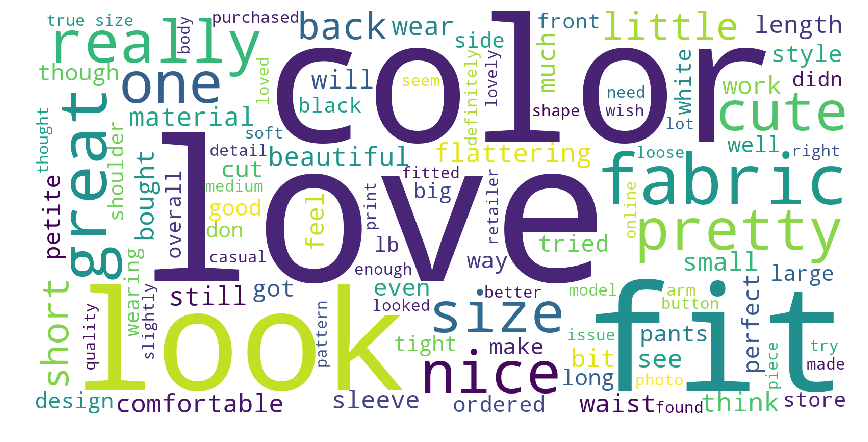

In [143]:
rating4= ecom[ecom['Rating']==4]['Review Text'].apply(clean_data)
create_cloud(rating4)

### Top Words in Rating = 3
* look
* fit
* color
* fabric
* really
* love

negative words detected: disappointed, unfortunately, return

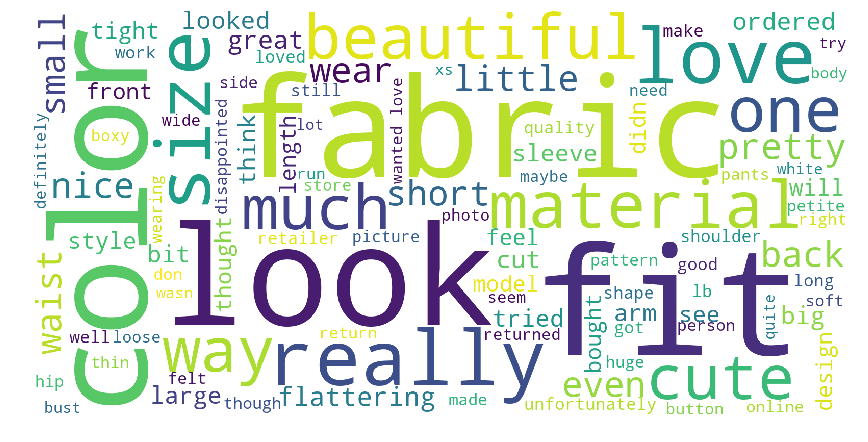

In [145]:
rating3= ecom[ecom['Rating']==3]['Review Text'].apply(clean_data)
create_cloud(rating3)

### Top Words in Rating = 2
* look
* fit
* fabric
* color

negative words detected: tight, disappointed, going back

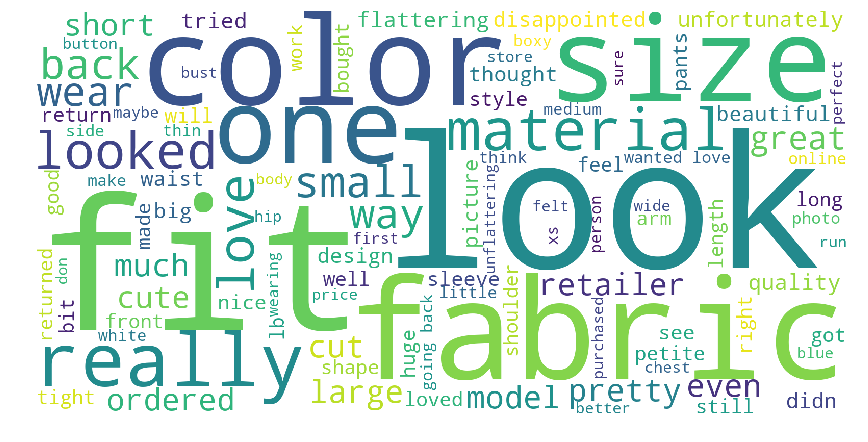

In [146]:
rating2= ecom[ecom['Rating']==2]['Review Text'].apply(clean_data)
create_cloud(rating2)

### Top Words in Rating = 1
* look
* fabric
* color
* fit

negative words detected: returned, cheap, going back

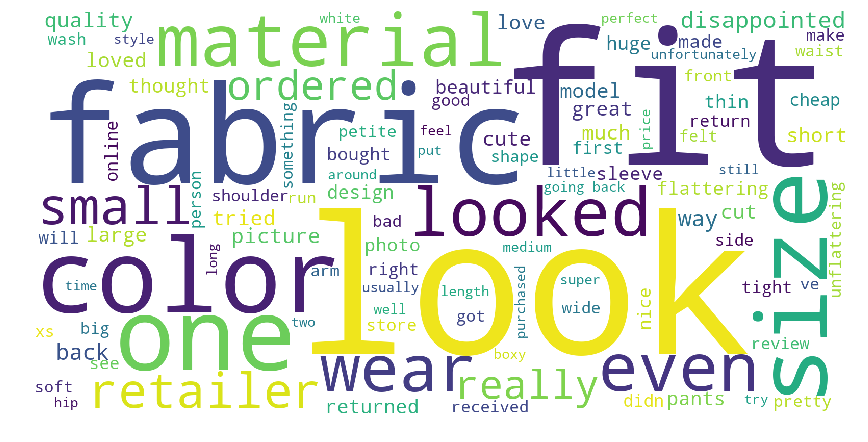

In [147]:
rating1= ecom[ecom['Rating']==1]['Review Text'].apply(clean_data)
create_cloud(rating1)

### Thank you for reading! 
#### Your feedback is very much appreciated! 